In [1]:
# Features:
#  - read data from BYB (.wav) file

In [262]:
import numpy as np
import math
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy import signal

In [263]:
# Crop A One-Dimensional Data Array from the Front

def front_crop(data_array, crop_at):
    # Crop the front of a data array
    # crop_at(int): the index of the last sample to remove from the front of the data array
    # return the cropped array
    if crop_at > len(data_array):
        return "ERROR: crop_at larger than data"
    else:
        return data_array[crop_at+1:]

In [264]:
# Crop A One-Dimensional Data Array from the Back

def back_crop(data_array, crop_at):
    # Crop the back of a data array
    # crop_at(int): the index of the last sample to remove from the back of the data array
    # return the cropped array
    if crop_at > len(data_array):
        return "ERROR: crop_at larger than data"
    else:
        return data_array[:crop_at]

In [265]:
def bp_filter(data2f, cutoff, filt_type, sample_rate):
    # Bandpass filter above or below a cutoff frequency
        # data2f - data to filter
        # cutoff - cutoff frequency
        # filt_type - 'high' - remove fq's below cuttoff
        #             'low' - remove fq's above cutoff 

    b, a = signal.butter(2, cutoff, filt_type, fs=sample_rate)
    fd_data = signal.filtfilt(b, a, data2f) # filtered data
    
    return fd_data

In [266]:
def gen_test_sig(n, sample_rate, f, plot=True, return_axis=False):
    # Generate a Test Signal with a specific number of samples, sample rate, and frequency
    # Warning: Be sure the frequency of signal you want to generate is at most 1/4 the sample_rate...
    #             ...you choose to ensure a high quality signal
    # -----------------------------------------------------------------------------------------------
    # n - Samples Recorded
    # sample_rate - # Samples per Second
    # f - Frequency of Signal to Generate
    # plot - Plot the Signal
    # -----------------------------------------------------------------------------------------------
    # Return a 1D vector sine wave of frequency f, sample rate sample_rate, n-samples long
    #    - (optional) set return_axis to True to return 3x1D array [Y, X, T]
    # -----------------------------------------------------------------------------------------------

    X = np.linspace(0, n-1, n) # Samples (zero-indexed)
    T = X/sample_rate # Time in seconds

    Y = [] # Sin Wave of chosen frequency

    for t in T:
        Y.append(np.sin(f*(2*np.pi*t)))
        
    if plot:
        print("Plotting Test Signal")
        plt.plot(T, Y)
        plt.title(str(f) + " Cycle(s) per Second Sin Wave")
        plt.ylabel("Amplitude")
        plt.xlabel("Seconds")
        plt.tick_params(left=False, bottom=False)
        
    if return_axis:
        return [Y, X, T]
    else:
        return Y

In [388]:
def fourier_transform(y, n_samp, samp_rate, plot=True, max_fq=0):
    # Transform time-series data into frequency data
    # --------------------------------------------------------------------
    # y - the time-series data
    # n_samp - number of samples in
    # samp_rate - data collection sample rate
    # max_fq - max frequency plotted (must be less than half the sampling rate)
    # --------------------------------------------------------------------
    # Return: A list of vectors - (component wave coefficient, approximate corresponding wave frequency)
    #         ... half (+1) as long as the initial data set
    # --------------------------------------------------------------------
    
    fft = np.fft.fft(y)
    
    # Safely Get Absolute Value - might still have issues for certain cases
    half = n_samp / 2
    ta = pow(fft[int(half):], 2)
    FQ = np.sqrt(ta)
    
    if (half%2 == 0):
        x_axis = np.linspace(int((samp_rate/2)-(samp_rate/n)), 0, int(half))
    else:
        x_axis = np.linspace(int((samp_rate/2)-(samp_rate/n)), 0, int(half)+1)


    if plot:
        plt.plot(x_axis, FQ)
        
        if (max_fq != 0):
            plt.xlim(0, max_fq)
        else: 
            plt.xlim(0, int(samp_rate/2))
    
    return FQ, x_axis

In [364]:
# Read Data
filename = "BYB_Recording_2022-06-08_20.34.54.wav"
sample_rate, raw_data = wavfile.read(filename)
rec_time = len(raw_data) / sample_rate

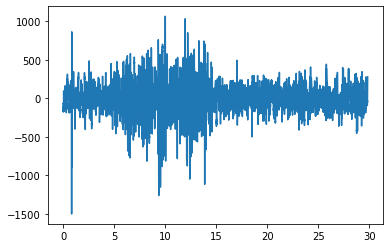

In [365]:
X = np.linspace(0, rec_time, len(raw_data))
Y2 = raw_data
plt.plot(X, Y2)

# Filter

In [373]:
fd_data = bp_filter(raw_data, 50, 'low', sample_rate)

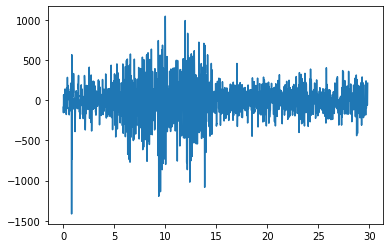

In [374]:
X = np.linspace(0, rec_time, len(fd_data))
Y3 = fd_data
plt.plot(X, Y3)

# Generate Test Signal

Plotting Test Signal


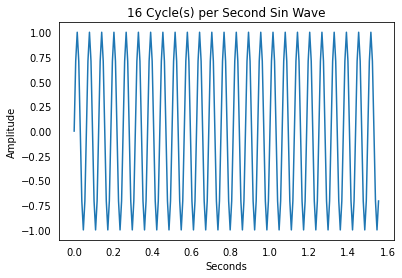

In [354]:
n = 200
sample_rate = 128
f = 16

Y1 = gen_test_sig(n, sample_rate, f, plot=True)

# Fast Fourier Transform

In [355]:
fft = np.fft.fft(Y1)

C:\Users\Owner\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, '???')

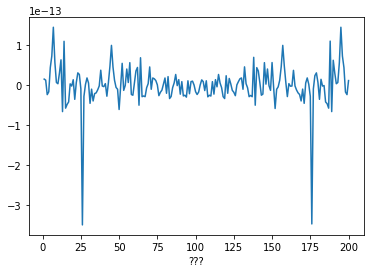

In [356]:
X = np.linspace(1, np.size(Y1), np.size(Y1))
Y = fft

plt.plot(X, Y)
plt.xlabel("???")

C:\Users\Owner\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(array([2.33616910e-14-4.73316543e-30j, 1.72724717e-14+2.14273044e-14j,
        4.30593703e-16-2.16019145e-14j, 1.33319857e-14+4.60250141e-15j,
        8.84483895e-15+1.80355102e-14j, 1.34637585e-14-1.03306855e-14j,
        1.10236852e-14-1.72555007e-14j, 2.91412161e-14-3.48561156e-14j,
        2.51713945e-14+1.79431503e-14j, 2.72142751e-14-2.13579979e-15j,
        8.89055308e-15-1.64382148e-14j, 2.24126126e-14+4.82159990e-14j,
        1.38683016e-14+4.06747138e-15j, 4.10400057e-15-3.03326901e-15j,
        2.68496874e-14-2.27733351e-14j, 5.52411817e-15+1.35468216e-14j,
        6.05242481e-15-2.44685634e-14j, 2.86683546e-14-1.24312019e-14j,
        3.34760093e-14+3.66209718e-14j, 2.37037339e-14+3.24068096e-16j,
        2.02817451e-14+2.04924413e-14j, 1.68488418e-14-1.27138022e-14j,
        3.37806635e-15-1.01836027e-14j, 1.28847342e-14-1.77474585e-14j,
        1.77510306e-14-1.52359132e-14j, 2.62918918e-14+3.42746786e-14j,
        8.17565858e-16-4.19666062e-15j, 8.89539330e-15-2.6518814

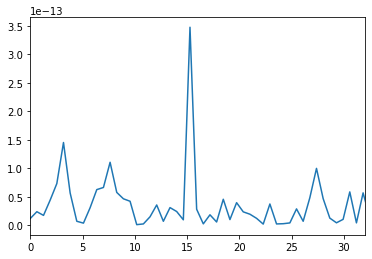

In [357]:
fourier_transform(Y, np.size(Y), sample_rate)

In [352]:
ta = pow(Y[int(half):], 2)
tb = np.sqrt(ta)

C:\Users\Owner\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


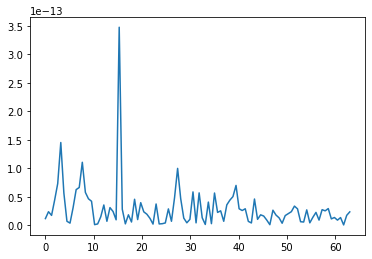

In [353]:
half = n/2

# np.size(X[:half])

# x_axis = (sample_rate/2)*(X[half:]/(half*2))
x_axis = np.linspace(int((sample_rate/2)-(sample_rate/n)), 0, int(half))

plt.plot(x_axis, tb)

C:\Users\Owner\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0.0, 40.0)

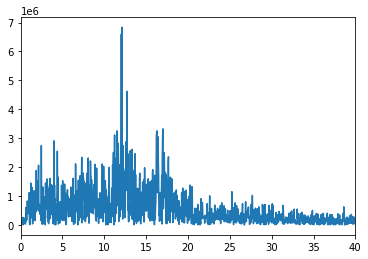

In [284]:
half = np.size(Y2)/2

# np.size(X[:half])

# x_axis = (sample_rate/2)*(X[half:]/(half*2))
x_axis = np.linspace(int((sample_rate/2)-(sample_rate/np.size(Y2))), 0, int(half)+1)

plt.plot(x_axis, tb)
plt.xlim(0, 40)

C:\Users\Owner\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(array([  149.51129273-7.88220868e-04j,   149.51129273+7.88220953e-04j,
          149.51129273+2.36466271e-03j, ...,
        24054.12057454+3.65320225e+04j, 19246.03355012+6.97028260e+03j,
         7834.1060589 -1.00118626e+04j]),
 array([4.95000000e+03, 4.94996680e+03, 4.94993361e+03, ...,
        6.63921563e-02, 3.31960782e-02, 0.00000000e+00]))

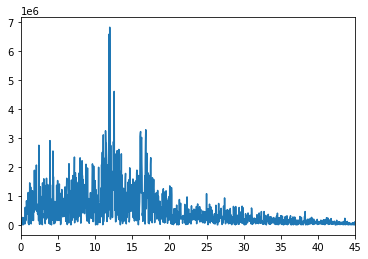

In [386]:
fourier_transform(Y3, np.size(Y3), sample_rate, max_fq=45)

C:\Users\Owner\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Owner\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(array([6.06011186e+01-6.37577570e-04j, 6.06011186e+01+6.37577528e-04j,
        6.06011186e+01+1.91273266e-03j, ...,
        4.49699664e+04-7.55874236e+04j, 6.64671202e+04-1.05721649e+04j,
        3.33448495e+04+9.61801824e+03j]),
 array([4.95000000e+03, 4.94993361e+03, 4.94986722e+03, ...,
        1.32784313e-01, 6.63921563e-02, 0.00000000e+00]))

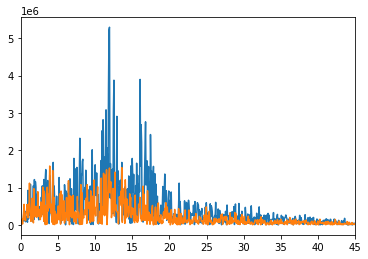

In [385]:
fourier_transform(Y3[:149114 + 1], 149114, sample_rate, max_fq=45) # Section of trial when eyes were closed
fourier_transform(Y3[149114:], 149114, sample_rate, max_fq=45) # Section of trial when eyese were open